# Aim:
To implement Naïve Bayes algorithm for classification.

Task 1: For the given car data set, apply Naïve Bayes algorithm for the classification. Show all the steps of training phase and identify the class for test data point (color =Yellow, Type=Sports, Origin=Domestic). Solve answer on paper and upload the image

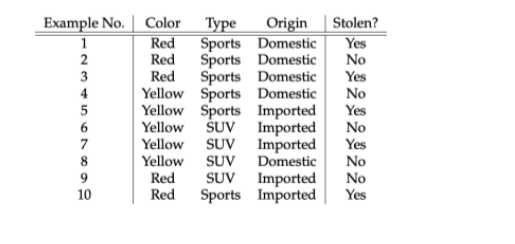


Task 2: For the given adult.csv dataset, perform below operations.

· Upload data set into the dataframe

· Check the shape of the data set.

· Find out all the categorical columns from the data set

· Check if null values exist in all the categorical columns

· Identify the problems with “workclass”, “Occupation”,”native_country” columns and rectify it.

· Explore numeric columns and check any null values exist for the numeric columns.

· Create a feature vector with x= all the columns except income and y=income

· Implement feature engineering for the train, test split data set:

o Check the data types of columns of the input features of training data set

o Identify categorical columns that has null values and fill them with most probable value in the data set

o Repeat above step for the input features of test data set

o Apply one hot encoding on all the categorical columns

o Apply feature scaling using robust scaler

Task 3: Implement KNN algorithm on the given data set from Sklearn library with k=5

Task 4: Implement Naïve Bayes on the given data set.

Task 5: Compare confusion matrix for both the classifier

Task 6: Compare accuracy score of both the classifier.

Task 7: Draw ROC curve for comparing both the models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/adultPrac7.csv')

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

In [ ]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [ ]:
# check labels in workclass variable
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# check frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# REPLACE '?' VALUES IN WORKCLASS VARIABLE WITH 'NaN'
df['workclass'].replace(' ?',np.NaN, inplace=True)

In [ ]:
#again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# check labels in occupation variable
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
# check frequency distribution of values in occupation variable
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# REPLACE '?' VALUES IN OCCUPATION VARIABLE WITH 'NaN'
df['occupation'].replace(' ?',np.NaN, inplace=True)

In [ ]:
#again check the frequency distribution of values in occupation variable
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# check labels in native_country variable
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
# check frequency distribution of values in native_country variable
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
# REPLACE '?' VALUES IN Native_country WITH 'NaN'
df['native_country'].replace(' ?',np.NaN, inplace=True)

In [ ]:
#again check the frequency distribution of values in native_country variable
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
X = df.drop(['income'], axis=1)
Y = df['income']

In [ ]:
# check data types in x
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [ ]:
# display categorical variables
categorical = [col for col in X.columns if X[col].dtypes == 'O']


In [ ]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
#display numeric values
numerical = [col for col in X.columns if X[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [ ]:
#print percentage of  missing values in categorical variables 
X[categorical].isnull().mean()

workclass         0.056386
education         0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017905
dtype: float64

In [ ]:
# impute missing categorical vairables with the most frequent value
for df2 in [X]:
  df2['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
  df2['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
  df2['native_country'].fillna(X['native_country'].mode()[0], inplace=True)

In [ ]:
#check missing values in X_train
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [ ]:
X[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

X['workclass']=label_encoder.fit_transform(X['workclass'])
X['education']=label_encoder.fit_transform(X['education'])
X['marital_status']=label_encoder.fit_transform(X['marital_status'])
X['relationship']=label_encoder.fit_transform(X['relationship'])
X['race']=label_encoder.fit_transform(X['race'])
X['sex']=label_encoder.fit_transform(X['sex'])
X['native_country']=label_encoder.fit_transform(X['native_country'])
X['occupation']=label_encoder.fit_transform(X['occupation'])

In [ ]:
X[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,6,9,4,0,1,4,1,38
1,5,9,2,3,0,4,1,38
2,3,11,0,5,1,4,1,38
3,3,1,2,5,0,2,1,38
4,3,9,2,9,5,2,0,4


In [ ]:
X.shape

(32561, 14)

In [ ]:
# Split X and Y intro training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#instantiate the model
gnb = GaussianNB()

#fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ac = accuracy_score(Y_test,y_pred)

In [ ]:
print(cm)

[[7382   73]
 [1920  394]]


In [ ]:
print(ac)

0.7959873067867745


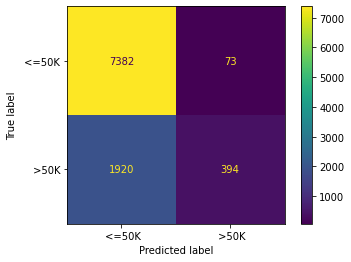

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
cm_naive = confusion_matrix(Y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive, display_labels=gnb.classes_)
disp.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
y_pred_knn = neigh.predict(X_test)
y_pred_knn

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

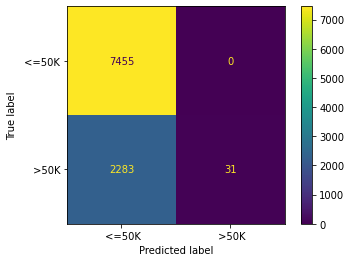

In [ ]:
cm_knn = confusion_matrix(Y_test, y_pred_knn, labels=neigh.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=neigh.classes_)
disp2.plot()


In [ ]:
print('Naive Bayes Classifier -->', accuracy_score(Y_test, y_pred))
print('KNN -->', accuracy_score(Y_test, y_pred_knn))


Naive Bayes Classifier --> 0.7959873067867745
KNN --> 0.7663015661787286


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.99      0.88      7455
        >50K       0.84      0.17      0.28      2314

    accuracy                           0.80      9769
   macro avg       0.82      0.58      0.58      9769
weighted avg       0.81      0.80      0.74      9769

